In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
import datetime as dt

In [76]:
#df_train = pd.read_csv('train_sample.csv', header = 0)
df_train = pd.read_csv('train_extra.csv', header = 0)

In [77]:
df_train.click_time = pd.to_datetime(df_train.click_time)
df_train["hour"] = df_train.click_time.dt.hour

df_train["hour"][df_train.hour < 8] = 1
df_train["hour"][(df_train.hour >= 8) & (df_train.hour <= 16)] = 2
df_train["hour"][(df_train.hour > 16)] = 3

C:\Users\Bailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
df_train = df_train.drop(['ip','attributed_time','click_time'],axis=1)

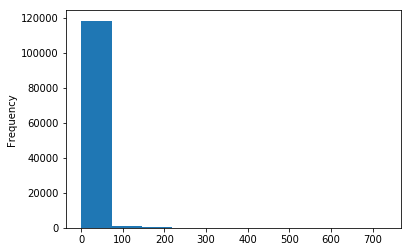

In [79]:
#app to categories

nrows = len(df_train)

df_train.app.plot.hist()
app_count = pd.DataFrame(df_train.app.value_counts())

app_cutoff = 0
for i in range(len(app_count)):
    s = sum(app_count["app"][0:i])
    if (s/nrows)>0.95 :
        app_cutoff = i
        break
app_cutoff

app_list = list(app_count["app"][0:app_cutoff].index.values)
df_train["app"][df_train.app.isin(app_list) == False] = 1234

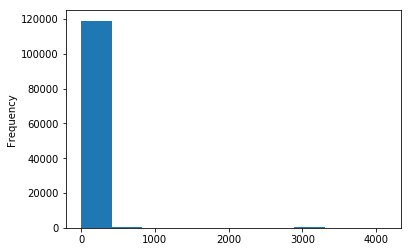

In [64]:
#Device to categories
df_train.device.plot.hist()
device_count = pd.DataFrame(df_train.device.value_counts())

device_cutoff = 0
for i in range(len(device_count)):
    s = sum(device_count["device"][0:i])
    if (s/nrows)>0.95 :
        device_cutoff = i
        break
device_cutoff
device_list = list(device_count["device"][0:device_cutoff].index.values)
df_train["device"][df_train.device.isin(device_list) == False] = 1234

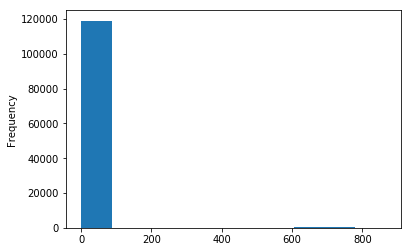

In [80]:
#os to categories
df_train.os.plot.hist()
os_count = pd.DataFrame(df_train.os.value_counts())

os_cutoff = 0
for i in range(len(os_count)):
    s = sum(os_count["os"][0:i])
    if (s/nrows)>0.95 :
        os_cutoff = i
        break
os_list = list(os_count["os"][0:os_cutoff].index.values)
df_train["os"][df_train.os.isin(os_list) == False] = 1234

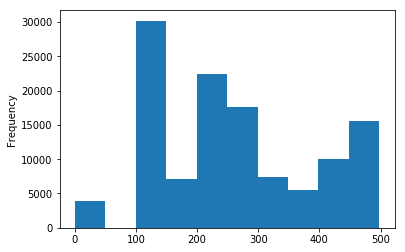

In [81]:
#channel to categories
df_train.channel.plot.hist()
df_train_true = df_train[df_train.is_attributed == 1]
nrows_true = len(df_train_true)
channel_count = pd.DataFrame(df_train_true.channel.value_counts())

channel_cutoff = 0
for i in range(len(channel_count)):
    s = sum(channel_count["channel"][0:i])
    if (s/nrows_true)>0.95 :
        channel_cutoff = i
        break
channel_list = list(channel_count["channel"][0:channel_cutoff].index.values)
df_train["channel"][df_train.channel.isin(channel_list) == False] = 1234

In [82]:
df_test = pd.read_csv("test.csv")

In [83]:
df_test.click_time = pd.to_datetime(df_test.click_time)
df_test["hour"]=  df_test.click_time.dt.hour

df_test["hour"][df_test.hour < 8] = 1
df_test["hour"][(df_test.hour >= 8) & (df_test.hour < 16)] = 2
df_test["hour"][df_test.hour >= 16] = 3

df_test.drop(["click_time", "ip"],1, inplace = True)

df_test["app"][df_test.app.isin(app_list) == False] = 1234
df_test["device"][df_test.device.isin(device_list) == False] = 1234
df_test["os"][df_test.os.isin(os_list) == False] = 1234
df_test["channel"][df_test.channel.isin(channel_list) == False] = 1234

C:\Users\Bailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
df_test= df_test.drop(['click_id'],axis=1)

In [85]:
train_df, test_df = train_test_split(df_train, test_size = 0.25, random_state = 1984)

In [86]:
train_df.is_attributed.sum()/train_df.shape[0]
test_df.is_attributed.sum()/test_df.shape[0]


0.1712

In [87]:
train_y = train_df.is_attributed
test_y = train_df.is_attributed

train_x = train_df.drop(['is_attributed'], axis = 1)
test_x = test_df.drop(['is_attributed'], axis = 1)

train_x = np.array(train_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
test_y = np.array(test_y)

In [88]:
adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

model = Sequential()
model.add(Dense(48, input_dim=train_x.shape[1],kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24,activation = "tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",optimizer='adam')

history = model.fit(train_x,train_y, validation_split=0.2, epochs=3, batch_size=64)


Train on 72000 samples, validate on 18000 samples
Epoch 1/3
72000/72000 [==============================] - 7s 98us/step - loss: 0.4147 - val_loss: 0.3281
Epoch 2/3
72000/72000 [==============================] - 6s 77us/step - loss: 0.3517 - val_loss: 0.3188
Epoch 3/3
72000/72000 [==============================] - 5s 67us/step - loss: 0.3291 - val_loss: 0.3048


In [89]:
predictions_NN_prob = model.predict(df_test)
predictions_NN_prob = predictions_NN_prob[:,0]

In [90]:
df_test['is_attributed'] = predictions_NN_prob
df1 = df_test
df1 = df1.drop(['app','device','os','channel','hour'],axis=1)
df1['click_id'] = df1.index
df1 = df1[['click_id','is_attributed']]

In [91]:
df1.to_csv("NNprediction_3.csv", index = False)